
## Assignment List (80 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Transform and plot image. (15 points)
2. Data loading. (10 points)
3. Train the baseline model and plot the learning curve. (15 points)

4. Comparison and analysis (20 points)
    * Compare the training results of 5, 20, and 50 epochs.
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 
    * Try a different data_transform function 
5. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results? (10 points)
6. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction. (10 points)
    * Does the model you trained get it right? 
    * If not, what do you think you could do to improve it?
    
## Advanced options (20 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
- A1: Train a complicated model on the dataset (ResNet18) (10 points) \
    **Remenber to resize the image data and recall dataloader**.
- A2: Compare the performance of a simple model (provided by the template) and the complicated model. (5 points)
      Plot learning curves in the same figure axes
- A3: Usage of git version control (5 points)
      Git add, git commit, git log, insert a screenshot within this notebook

### Deadline: 11.59 pm 16/01/2023
### Submit a rar/zip folder to brightspace under the unit of **Machine Learning for Media Production**


## 0. Importing PyTorch and setting up device-agnostic code

In [26]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.__version__, device


('1.13.0', 'cuda')

## 1. Get data
[Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).
In this assignment, only 3 classes are used to form a small classification dataset, it contains pizza, steak and sushi.
And instead of 1,000 images per class, ervey image class only has 100 images(10%).


In [27]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lizhiqihhh/AIM-MLWorkshop/raw/main/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [28]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

## Task 1

1. Transform training dataset and testing dataset.
2. Plot images 


## 1.1 Transforming data


In [29]:
# import libraries and packages
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [30]:
# Write transform for image
data_transform = transforms.Compose([
    # Step 1: Resize the images to 64x64
    # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
    transforms.Resize((64,64)),
    # Step 2: Turn the image into a torch.Tensor
    # converts all pixel values from 0-255 to be between 0-1
    transforms.ToTensor(),  
    # Step 3: RandomHorizontalFlip---Flip the images randomly on the horizontal p = probability of flip, 0.5 = 50% chance()
    transforms.RandomHorizontalFlip(p=0.5)
    
])

In [31]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # root should be the target folder of images
                                  transform=data_transform, # transform should be a set of transform functions to perform on images
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, # it should be the folder of test data 
                                 transform=data_transform) # same with transform applied to train_data

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
           )


In [32]:
len(train_data), len(test_data)

(225, 75)

## 1.2 Plot the transformed image
`Plot_imgs` and `plot_transformed_images` are defined in plot.py, complete the contents in plot.py 

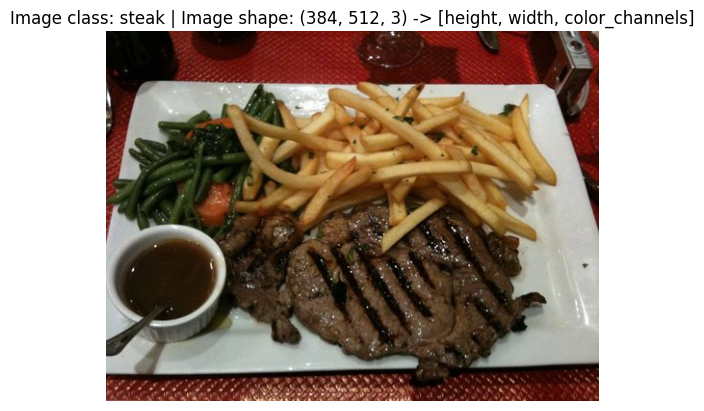

In [33]:
#from pathlib import Path
from plot import Plot_imgs
# Setup path to data folder !already setup above in Sec 1.0
#data_path = Path("data/")
#image_path = data_path / "pizza_steak_sushi"

# Plot an image using matplotlib
# Please complete the plot.py before use this plotting function
Plot_imgs(image_path, seed=36)

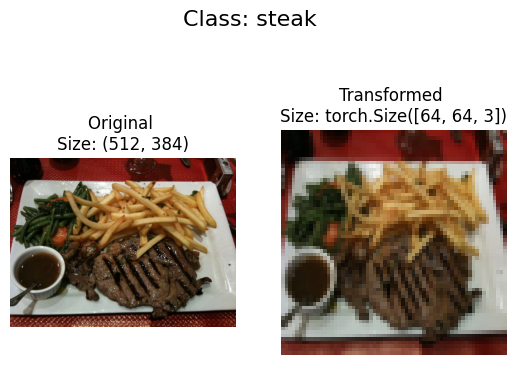

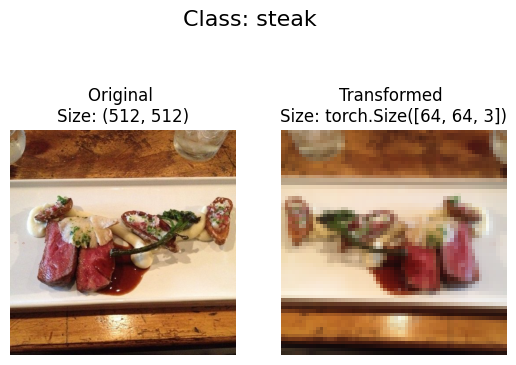

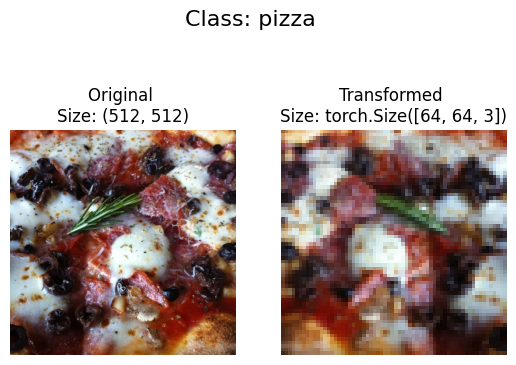

In [34]:
from plot import plot_transformed_images
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3,
                        seed=36)

In [35]:
# Get class names as a list
class_names = train_data.classes
# Try index on the `train_data` and `test_data` `Dataset`'s to find samples and their target labels.
img, label = train_data[200][0], train_data[200][1]
img2, label2 = test_data[0][0], test_data[0][1]
# Print the shape/content/datatype of img and label
print(img.shape, img.dtype, class_names[label])
print(img2.shape, img2.dtype, class_names[label2])

torch.Size([3, 64, 64]) torch.float32 sushi
torch.Size([3, 64, 64]) torch.float32 pizza


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'sushi')

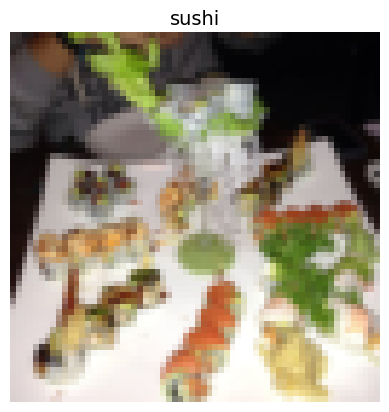

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


# ---------------Plot the permuted image-------------
plt.figure()
plt.imshow(img_permute)
# ---------------End of code------------------------
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 1.3 Turn loaded images into `DataLoader`'s

## Task 2: Turn train and test Datasets into DataLoaders (10 points)

In [37]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True) # shuffle training data

test_dataloader = DataLoader(test_data, batch_size=64) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1b3c2003c70>,
 <torch.utils.data.dataloader.DataLoader at 0x1b3c2003880>)

In [38]:
# Load a batch of images in the training dataset
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([64, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


`display_random_images` is defined in plot.py, please complete the contents in `plot.py`

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


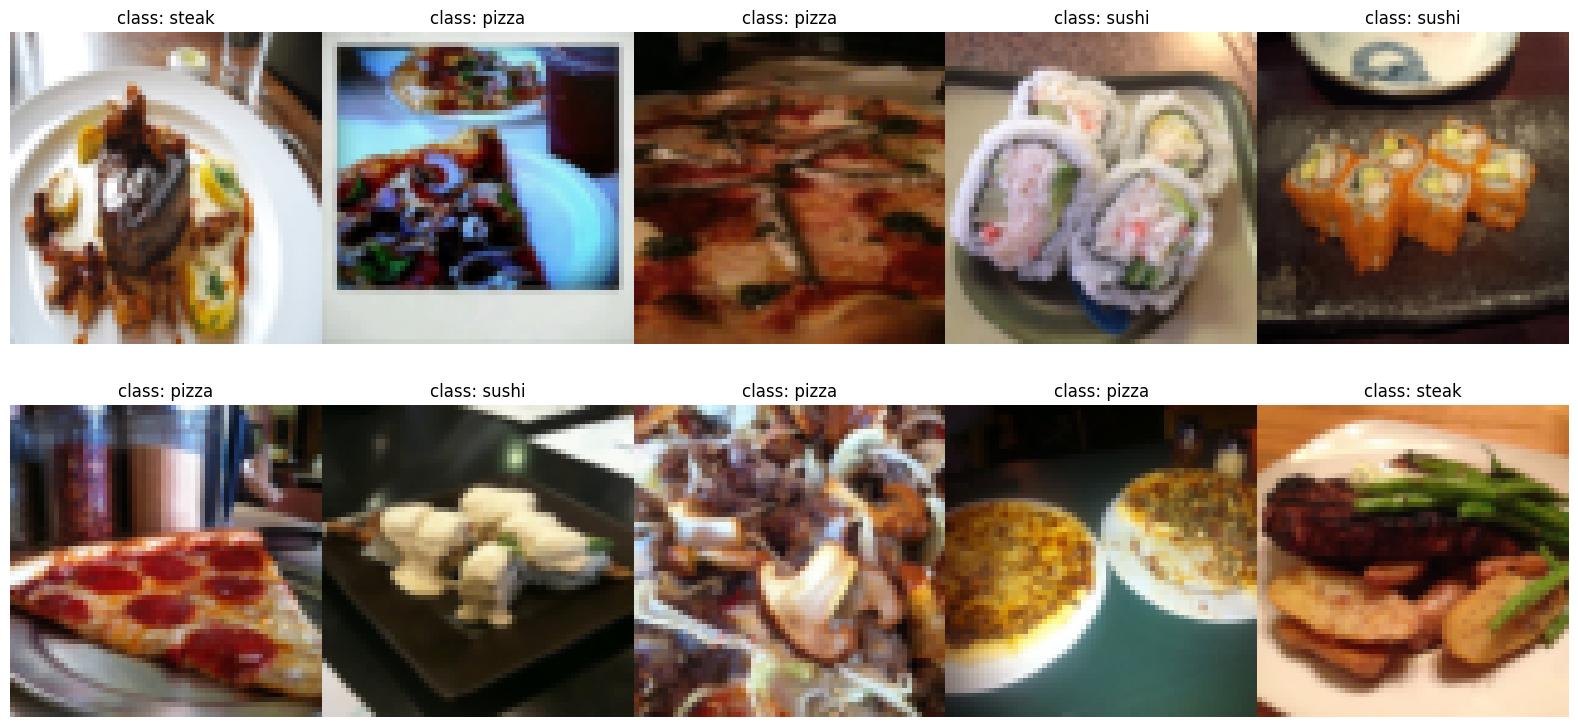

In [39]:
# Display random images from Dataset
from plot import display_random_images
display_random_images(train_data, 
                      n=12, 
                      classes=class_names,
                      seed=36)

## Task 3 Model_0 training
### Task 3.1 Train the baseline model TinyVGG


In [40]:
from TinyVGG import TinyVGG # import the model from TinyVGG.py
torch.manual_seed(42)

# --------------Initialize the TinyVGG model--------------
'''
    Parameters: input_shape
                hidden_units
                output_shape
'''
model_0 = TinyVGG(3, 50, 3).to(device) 
# -------------------  End of code -----------------------

model_0 # Print the model info here!

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(50, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [41]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))
print(img_batch.shape)

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

torch.Size([64, 3, 64, 64])
Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0376,  0.0161,  0.0077]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3224, 0.3402, 0.3374]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
1


In [42]:
# Load the training function from TinyVGG.py
from TinyVGG import train
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_0 --------------------------
# Fill in the parentheses with parameters needed in the train function
model_0_results = train(model= model_0,
                        train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= NUM_EPOCHS)
# -------------------------  End of code  --------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

100%|██████████| 5/5 [00:10<00:00,  2.11s/it]

Epoch: 5 | train_loss: 1.0675 | train_acc: 0.3363 | test_loss: 1.0072 | test_acc: 0.2642
Total training time: 10.548 seconds


### Task 3.2: Plot the loss curves of Model_0

From the print outs of our `model_0` training, it didn't look like it did too well.

Create a function to plot the values in the `model_0_results` dictionary.

In [80]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]], model_name= ''):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    train_loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    train_accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # --------------- Complete the following lines --------------
    # Plot loss, please include label, title, and legend in the figure
    plt.subplot(1, 2, 1)
    plt.plot(epochs , train_loss, label='train loss')   # plot epochs, train_loss
    plt.plot(epochs , test_loss, label='test loss')   # plot epochs, test_loss
    plt.title(model_name + 'loss performance')
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='train accuracy') # plot epochs, train_accuracy, add label
    plt.plot(epochs, test_accuracy, label = 'test accuracy') # plot epochs, test_accuracy, add label
    plt.title(model_name + 'accuracy performance')
    plt.xlabel('Epoch')
    plt.ylabel("Accuracy")
    plt.legend()
    # ---------------------- End of codes -----------------------

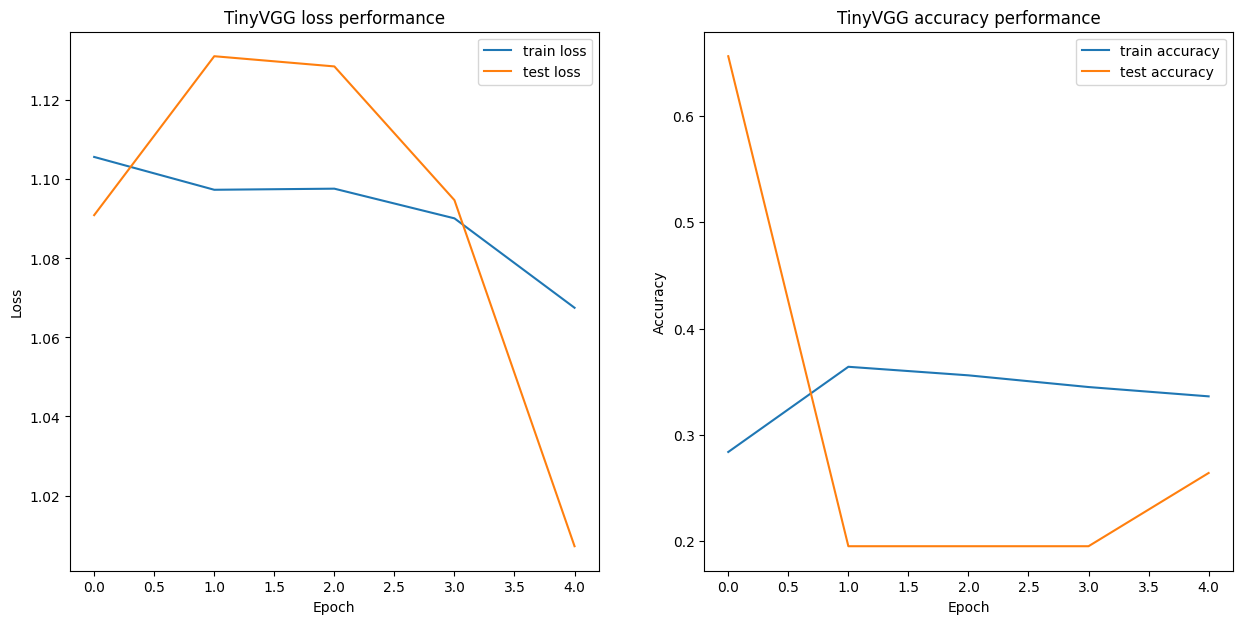

In [49]:
plot_loss_curves(model_0_results)

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.


In [35]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 50, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 50, 64, 64]           1,400
│    └─ReLU: 2-2                         [1, 50, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 50, 64, 64]           22,550
│    └─ReLU: 2-4                         [1, 50, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 50, 32, 32]           --
├─Sequential: 1-2                        [1, 50, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 50, 32, 32]           22,550
│    └─ReLU: 2-7                         [1, 50, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 50, 32, 32]           22,550
│    └─ReLU: 2-9                         [1, 50, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 50, 16, 16]           --


## Task 4: Comparison and analysis


### Task 4.1 Try different epochs


In [36]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# create a new instance of TinyVGG model
model_e_5 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_5.parameters(), lr=0.001)

model_e_5_results = train(model= model_e_5,
                        train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= 5)

100%|██████████| 5/5 [00:08<00:00,  1.69s/it]

Epoch: 5 | train_loss: 1.0982 | train_acc: 0.3451 | test_loss: 1.1282 | test_acc: 0.1953


In [37]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_20 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_20.parameters(), lr=0.001)

model_e_20_results = train(model= model_e_20,
                        train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= 20)

 25%|██▌       | 5/20 [00:08<00:24,  1.65s/it]

Epoch: 5 | train_loss: 1.0982 | train_acc: 0.3451 | test_loss: 1.1282 | test_acc: 0.1953


 50%|█████     | 10/20 [00:16<00:16,  1.66s/it]

Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3451 | test_loss: 1.1230 | test_acc: 0.1953


 75%|███████▌  | 15/20 [00:24<00:08,  1.68s/it]

Epoch: 15 | train_loss: 1.0937 | train_acc: 0.3340 | test_loss: 1.1030 | test_acc: 0.1953


100%|██████████| 20/20 [00:33<00:00,  1.65s/it]

Epoch: 20 | train_loss: 0.9530 | train_acc: 0.5236 | test_loss: 1.0813 | test_acc: 0.3253


In [79]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_50 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_50.parameters(), lr=0.001)

model_e_50_results = train(model= model_e_50,
                        train_dataloader= train_dataloader,
                        test_dataloader= test_dataloader,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= 50)

 10%|█         | 5/50 [00:09<01:20,  1.79s/it]

Epoch: 5 | train_loss: 1.0982 | train_acc: 0.3451 | test_loss: 1.1282 | test_acc: 0.1953


 20%|██        | 10/50 [00:18<01:12,  1.82s/it]

Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3451 | test_loss: 1.1230 | test_acc: 0.1953


 30%|███       | 15/50 [00:26<01:01,  1.75s/it]

Epoch: 15 | train_loss: 1.0925 | train_acc: 0.3340 | test_loss: 1.1033 | test_acc: 0.1953


 40%|████      | 20/50 [00:36<00:57,  1.90s/it]

Epoch: 20 | train_loss: 0.9931 | train_acc: 0.4615 | test_loss: 1.1170 | test_acc: 0.1797


 50%|█████     | 25/50 [00:45<00:45,  1.81s/it]

Epoch: 25 | train_loss: 0.8284 | train_acc: 0.6596 | test_loss: 1.1087 | test_acc: 0.3786


 60%|██████    | 30/50 [00:53<00:34,  1.73s/it]

Epoch: 30 | train_loss: 0.7705 | train_acc: 0.6510 | test_loss: 0.9965 | test_acc: 0.4240


 70%|███████   | 35/50 [01:02<00:24,  1.66s/it]

Epoch: 35 | train_loss: 0.7294 | train_acc: 0.7013 | test_loss: 1.0624 | test_acc: 0.4396


 80%|████████  | 40/50 [01:10<00:16,  1.66s/it]

Epoch: 40 | train_loss: 0.7072 | train_acc: 0.7053 | test_loss: 1.0997 | test_acc: 0.3643


 90%|█████████ | 45/50 [01:18<00:08,  1.62s/it]

Epoch: 45 | train_loss: 0.6823 | train_acc: 0.7358 | test_loss: 1.0216 | test_acc: 0.4865


100%|██████████| 50/50 [01:26<00:00,  1.74s/it]

Epoch: 50 | train_loss: 0.6592 | train_acc: 0.7177 | test_loss: 1.1164 | test_acc: 0.4787


### Compare: Print the differences

In [39]:
import pandas as pd 
model_compare_1 = pd.DataFrame(model_e_5_results)
model_compare_2 = pd.DataFrame(model_e_20_results)
model_compare_3 = pd.DataFrame(model_e_50_results)

model_compare_3

,train_loss,train_acc,test_loss,test_acc
0,1.100168,0.299124,1.094936,0.195312
1,1.100461,0.330374,1.108833,0.195312
2,1.097655,0.374408,1.110090,0.195312
3,1.098221,0.345052,1.121446,0.195312
4,1.098193,0.345052,1.128209,0.195312
5,1.097732,0.348722,1.129509,0.195312
6,1.098734,0.334044,1.130886,0.195312
7,1.098651,0.348722,1.131397,0.195312
8,1.097955,0.359730,1.128864,0.195312
9,1.098608,0.345052,1.122984,0.195312


### Analysis: What you find and how to improve model_0's performance?

**Your answer**: 

From the above analysis we can deduct that the model's performance increases with the number of epochs. The more epochs our model trains across the better its final accuracy and the lower the loss. However, this cannot be said about our test dataset, where we can see quite the opposite. The loss and the accuracy fluctuates around the same level with the increasing number of epochs, which looks like a typical overfitting problem, where the model fails to generalise to new data.

### Task 4.2 Try different data transform functions

In [50]:
import os
BATCH_SIZE = 128
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# --------- Create training transform with TrivialAugment ---------
# TrivialAugment: Tuning-Free Yet State-of-the-Art Data Augmentation (source:https://arxiv.org/abs/2103.10158)
train_transform_trivial_augment = transforms.Compose([
    # Resize
    transforms.Resize(size=(64,64)),
    # RandomHorizontalFlip
    transforms.RandomHorizontalFlip(p=0.5),
    # TrivialAugment
    transforms.TrivialAugmentWide(),
    # ToTensor
    transforms.ToTensor()    
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)
# ---------------------- End of code ----------------------

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x1b3e694cbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x1b3e694cb80>)

In [51]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(3,10,3).to(device)
model_1 # print model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [52]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_1 ----------------------------
# Fill in the parentheses with parameters needed in the train function
model_1_results = train(model= model_1,
                        train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= NUM_EPOCHS)
# ------------------------- End of model_1 ---------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

100%|██████████| 5/5 [00:09<00:00,  1.98s/it]

Epoch: 5 | train_loss: 1.0981 | train_acc: 0.3459 | test_loss: 1.1018 | test_acc: 0.3333
Total training time: 9.926 seconds


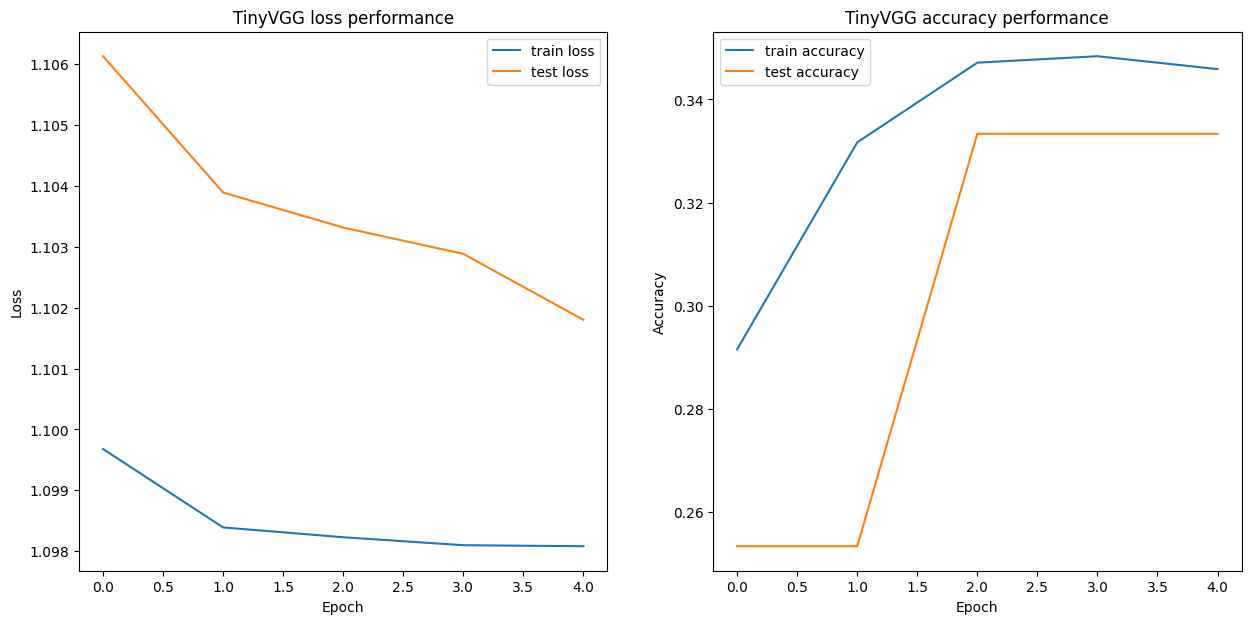

In [53]:
plot_loss_curves(model_1_results)

## Task 5: Double the number of hidden units in your model and train it for 20 epochs

In [56]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(3,20,3).to(device) # use 20 hidden units instead of 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model= model_2,
                        train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= 250)

  2%|▏         | 5/250 [00:10<07:58,  1.95s/it]

Epoch: 5 | train_loss: 1.0979 | train_acc: 0.3484 | test_loss: 1.1021 | test_acc: 0.3333


  4%|▍         | 10/250 [00:19<07:41,  1.92s/it]

Epoch: 10 | train_loss: 1.0937 | train_acc: 0.3496 | test_loss: 1.0976 | test_acc: 0.3467


  6%|▌         | 15/250 [00:29<07:49,  2.00s/it]

Epoch: 15 | train_loss: 1.0509 | train_acc: 0.4834 | test_loss: 1.0541 | test_acc: 0.4533


  8%|▊         | 20/250 [00:39<07:29,  1.96s/it]

Epoch: 20 | train_loss: 0.9764 | train_acc: 0.5284 | test_loss: 1.0096 | test_acc: 0.3600


 10%|█         | 25/250 [00:48<06:57,  1.86s/it]

Epoch: 25 | train_loss: 0.8969 | train_acc: 0.6012 | test_loss: 0.9810 | test_acc: 0.3733


 12%|█▏        | 30/250 [00:58<06:51,  1.87s/it]

Epoch: 30 | train_loss: 0.9342 | train_acc: 0.5377 | test_loss: 0.9837 | test_acc: 0.4400


 14%|█▍        | 35/250 [01:07<06:34,  1.83s/it]

Epoch: 35 | train_loss: 0.8813 | train_acc: 0.5749 | test_loss: 0.9720 | test_acc: 0.4533


 16%|█▌        | 40/250 [01:16<06:22,  1.82s/it]

Epoch: 40 | train_loss: 0.8593 | train_acc: 0.6166 | test_loss: 0.9506 | test_acc: 0.4800


 18%|█▊        | 45/250 [01:25<06:17,  1.84s/it]

Epoch: 45 | train_loss: 0.7568 | train_acc: 0.6527 | test_loss: 0.9464 | test_acc: 0.5333


 20%|██        | 50/250 [01:34<06:08,  1.84s/it]

Epoch: 50 | train_loss: 0.8322 | train_acc: 0.6244 | test_loss: 0.9189 | test_acc: 0.5200


 22%|██▏       | 55/250 [01:44<06:11,  1.90s/it]

Epoch: 55 | train_loss: 0.8016 | train_acc: 0.6397 | test_loss: 0.9073 | test_acc: 0.5200


 24%|██▍       | 60/250 [01:53<05:53,  1.86s/it]

Epoch: 60 | train_loss: 0.8027 | train_acc: 0.6296 | test_loss: 0.9227 | test_acc: 0.5333


 26%|██▌       | 65/250 [02:03<05:42,  1.85s/it]

Epoch: 65 | train_loss: 0.7729 | train_acc: 0.6476 | test_loss: 0.9447 | test_acc: 0.5200


 28%|██▊       | 70/250 [02:11<05:19,  1.78s/it]

Epoch: 70 | train_loss: 0.7904 | train_acc: 0.6413 | test_loss: 0.9130 | test_acc: 0.5733


 30%|███       | 75/250 [02:20<04:53,  1.68s/it]

Epoch: 75 | train_loss: 0.7306 | train_acc: 0.6738 | test_loss: 0.9694 | test_acc: 0.5067


 32%|███▏      | 80/250 [02:28<04:43,  1.67s/it]

Epoch: 80 | train_loss: 0.7744 | train_acc: 0.6840 | test_loss: 0.9049 | test_acc: 0.5467


 34%|███▍      | 85/250 [02:36<04:36,  1.67s/it]

Epoch: 85 | train_loss: 0.7211 | train_acc: 0.6788 | test_loss: 0.9029 | test_acc: 0.5867


 36%|███▌      | 90/250 [02:45<04:27,  1.67s/it]

Epoch: 90 | train_loss: 0.6983 | train_acc: 0.7005 | test_loss: 0.8703 | test_acc: 0.6800


 38%|███▊      | 95/250 [02:53<04:17,  1.66s/it]

Epoch: 95 | train_loss: 0.7312 | train_acc: 0.6813 | test_loss: 0.8889 | test_acc: 0.6400


 40%|████      | 100/250 [03:02<04:10,  1.67s/it]

Epoch: 100 | train_loss: 0.6839 | train_acc: 0.7318 | test_loss: 0.9508 | test_acc: 0.6000


 42%|████▏     | 105/250 [03:10<04:01,  1.66s/it]

Epoch: 105 | train_loss: 0.6463 | train_acc: 0.6932 | test_loss: 0.8899 | test_acc: 0.6533


 44%|████▍     | 110/250 [03:19<03:59,  1.71s/it]

Epoch: 110 | train_loss: 0.6715 | train_acc: 0.6866 | test_loss: 0.9040 | test_acc: 0.6133


 46%|████▌     | 115/250 [03:27<03:45,  1.67s/it]

Epoch: 115 | train_loss: 0.7313 | train_acc: 0.6777 | test_loss: 0.8993 | test_acc: 0.5733


 48%|████▊     | 120/250 [03:35<03:36,  1.67s/it]

Epoch: 120 | train_loss: 0.7323 | train_acc: 0.7076 | test_loss: 0.9372 | test_acc: 0.6400


 50%|█████     | 125/250 [03:44<03:29,  1.68s/it]

Epoch: 125 | train_loss: 0.6524 | train_acc: 0.7188 | test_loss: 0.8886 | test_acc: 0.6000


 52%|█████▏    | 130/250 [03:52<03:20,  1.67s/it]

Epoch: 130 | train_loss: 0.5649 | train_acc: 0.7591 | test_loss: 0.9245 | test_acc: 0.6000


 54%|█████▍    | 135/250 [04:00<03:12,  1.67s/it]

Epoch: 135 | train_loss: 0.5968 | train_acc: 0.7696 | test_loss: 0.9205 | test_acc: 0.5733


 56%|█████▌    | 140/250 [04:09<03:11,  1.74s/it]

Epoch: 140 | train_loss: 0.6329 | train_acc: 0.7214 | test_loss: 0.9450 | test_acc: 0.5867


 58%|█████▊    | 145/250 [04:18<02:55,  1.67s/it]

Epoch: 145 | train_loss: 0.5803 | train_acc: 0.7566 | test_loss: 0.9342 | test_acc: 0.6267


 60%|██████    | 150/250 [04:26<02:46,  1.67s/it]

Epoch: 150 | train_loss: 0.6053 | train_acc: 0.7524 | test_loss: 0.9393 | test_acc: 0.5867


 62%|██████▏   | 155/250 [04:34<02:38,  1.67s/it]

Epoch: 155 | train_loss: 0.5648 | train_acc: 0.8249 | test_loss: 0.9011 | test_acc: 0.6133


 64%|██████▍   | 160/250 [04:43<02:40,  1.78s/it]

Epoch: 160 | train_loss: 0.6922 | train_acc: 0.7022 | test_loss: 1.0247 | test_acc: 0.5467


 66%|██████▌   | 165/250 [04:52<02:25,  1.71s/it]

Epoch: 165 | train_loss: 0.6077 | train_acc: 0.7343 | test_loss: 0.9064 | test_acc: 0.5467


 68%|██████▊   | 170/250 [05:01<02:21,  1.77s/it]

Epoch: 170 | train_loss: 0.5919 | train_acc: 0.7305 | test_loss: 0.9307 | test_acc: 0.6133


 70%|███████   | 175/250 [05:09<02:07,  1.70s/it]

Epoch: 175 | train_loss: 0.6068 | train_acc: 0.7721 | test_loss: 0.9032 | test_acc: 0.6267


 72%|███████▏  | 180/250 [05:17<01:55,  1.65s/it]

Epoch: 180 | train_loss: 0.6410 | train_acc: 0.7694 | test_loss: 0.9097 | test_acc: 0.6133


 74%|███████▍  | 185/250 [05:26<01:46,  1.64s/it]

Epoch: 185 | train_loss: 0.6125 | train_acc: 0.7513 | test_loss: 0.9052 | test_acc: 0.6400


 76%|███████▌  | 190/250 [05:34<01:38,  1.65s/it]

Epoch: 190 | train_loss: 0.5200 | train_acc: 0.7849 | test_loss: 1.0508 | test_acc: 0.6000


 78%|███████▊  | 195/250 [05:43<01:37,  1.78s/it]

Epoch: 195 | train_loss: 0.6038 | train_acc: 0.7760 | test_loss: 0.8561 | test_acc: 0.6800


 80%|████████  | 200/250 [05:51<01:24,  1.69s/it]

Epoch: 200 | train_loss: 0.5603 | train_acc: 0.7516 | test_loss: 0.9564 | test_acc: 0.6000


 82%|████████▏ | 205/250 [06:00<01:14,  1.66s/it]

Epoch: 205 | train_loss: 0.4999 | train_acc: 0.7811 | test_loss: 1.0570 | test_acc: 0.5600


 84%|████████▍ | 210/250 [06:08<01:06,  1.66s/it]

Epoch: 210 | train_loss: 0.5012 | train_acc: 0.7902 | test_loss: 1.1501 | test_acc: 0.5467


 86%|████████▌ | 215/250 [06:17<00:59,  1.69s/it]

Epoch: 215 | train_loss: 0.5064 | train_acc: 0.8252 | test_loss: 1.0356 | test_acc: 0.6533


 88%|████████▊ | 220/250 [06:25<00:49,  1.67s/it]

Epoch: 220 | train_loss: 0.5469 | train_acc: 0.7733 | test_loss: 1.0409 | test_acc: 0.5867


 90%|█████████ | 225/250 [06:34<00:44,  1.77s/it]

Epoch: 225 | train_loss: 0.5362 | train_acc: 0.7953 | test_loss: 1.0029 | test_acc: 0.5867


 92%|█████████▏| 230/250 [06:44<00:38,  1.92s/it]

Epoch: 230 | train_loss: 0.4889 | train_acc: 0.8133 | test_loss: 0.9649 | test_acc: 0.6000


 94%|█████████▍| 235/250 [06:53<00:28,  1.90s/it]

Epoch: 235 | train_loss: 0.5035 | train_acc: 0.7941 | test_loss: 0.9229 | test_acc: 0.6267


 96%|█████████▌| 240/250 [07:03<00:18,  1.80s/it]

Epoch: 240 | train_loss: 0.4543 | train_acc: 0.8174 | test_loss: 1.0243 | test_acc: 0.5733


 98%|█████████▊| 245/250 [07:11<00:08,  1.71s/it]

Epoch: 245 | train_loss: 0.5117 | train_acc: 0.8019 | test_loss: 0.9284 | test_acc: 0.6133


100%|██████████| 250/250 [07:20<00:00,  1.76s/it]

Epoch: 250 | train_loss: 0.4306 | train_acc: 0.8291 | test_loss: 1.0269 | test_acc: 0.5867


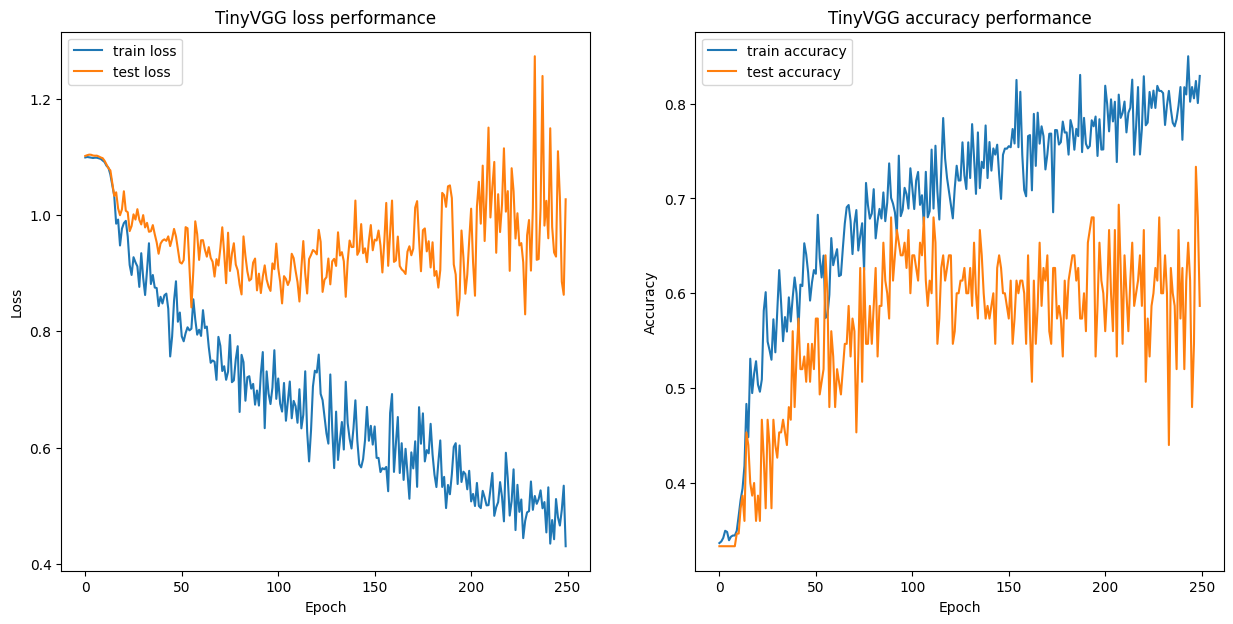

In [57]:
plot_loss_curves(model_2_results)

# RESULTS

From the above tests we can see that by adding  transforms like TrivialAugment, increasing the number of epochs and increasing the number of hidden layers, the performance of the TinyVGG model increases on our dataset. For better visualization and stronger data I have decided to increase the epochs to 250. This shows us that after about 100 epoch the performance of the models stops improving and oscilates around 60% accuracy on the test dataset even though the train accuracy is increasing.

## Task 6: Make prediction on a custom image based on model_2


In [68]:
# Read a custom image from img_path and represent it as a tensor datatype
import torchvision

img_path = './data/'
custom_image = img_path + "japanese-sushi-rolls.jpg"
img = torchvision.io.read_image(custom_image)


Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

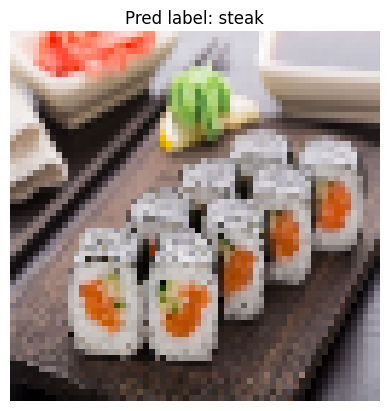

In [69]:
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize(size=(64,64))
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img.to(device))
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction\
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     


### Analysis
Does the model you trained get it right?
If not, how to improve it?\
**Your answer:**

No. all the time. After testing the model on multiple images inside /data directory, it performed pretty poor. It guessed the steak correctly but failed to recognize the sushi rolls and pizza. I suspect the problem must be with the data itself. We only have a dataset of 300 images which is considered very small against the ML standarts. Also the images contain multiple distracting objects apart from  sushsi, pizza and steak themselves. 

To improve the model I suggest increasing the size of the dataset and further preprocessing the data. For example cropping the image only to the pixels which contain the label.

## Advanced tasks
### A1: Train a complicated model (Use ResNet18 as an example) (10 points)

### Read `Resnet18_pytorch.py` and complete the model file
> If you finish `Resnet18_pytorch.py` correctly, run the following line will generate a vector with shape = ([1,3])

In [70]:

!python Resnet18_pytorch.py

torch.Size([1, 3])Output feature size.


In [71]:
from Resnet18_pytorch import ResNet, BasicBlock
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(42)
model_resnet = ResNet(img_channels=3, num_layers=18, block=BasicBlock, num_classes=3).to(device)
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Preparing train dataloader and test dataloader


In [72]:
BATCH_SIZE=64
NUM_WORKERS=2
# ----- Complete the following transform functions -----
train_transform_augment = transforms.Compose([
    # Resize
    transforms.Resize(size=(64,64)),
    # ToTensor
    transforms.ToTensor()    
])
#  ----------------  End of code --------------------
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augment)
train_dataloader_resnet = DataLoader(dataset= train_data_augmented, batch_size= BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset= test_data, batch_size= BATCH_SIZE, num_workers= NUM_WORKERS)

train_dataloader_resnet, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x1b3d1922080>,
 <torch.utils.data.dataloader.DataLoader at 0x1b3d1920280>)

#### Start training

In [73]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet.parameters(), lr=0.0005)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()
from TinyVGG import train
# Train model
model_resnet_results = train(model= model_resnet,
                        train_dataloader= train_dataloader_resnet,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fn= loss_fn,
                        epochs= NUM_EPOCHS)
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 5/50 [00:39<05:54,  7.87s/it]

Epoch: 5 | train_loss: 0.0294 | train_acc: 0.9883 | test_loss: 2.6583 | test_acc: 0.2109


 20%|██        | 10/50 [01:16<04:46,  7.16s/it]

Epoch: 10 | train_loss: 0.0326 | train_acc: 0.9885 | test_loss: 3.4800 | test_acc: 0.5007


 30%|███       | 15/50 [01:51<04:08,  7.11s/it]

Epoch: 15 | train_loss: 0.1393 | train_acc: 0.9575 | test_loss: 2.5992 | test_acc: 0.4411


 40%|████      | 20/50 [02:25<03:33,  7.13s/it]

Epoch: 20 | train_loss: 0.0110 | train_acc: 1.0000 | test_loss: 1.5512 | test_acc: 0.5007


 50%|█████     | 25/50 [03:01<02:55,  7.03s/it]

Epoch: 25 | train_loss: 0.0017 | train_acc: 1.0000 | test_loss: 1.6684 | test_acc: 0.6151


 60%|██████    | 30/50 [03:40<02:29,  7.45s/it]

Epoch: 30 | train_loss: 0.0021 | train_acc: 1.0000 | test_loss: 1.8834 | test_acc: 0.4929


 70%|███████   | 35/50 [04:14<01:43,  6.88s/it]

Epoch: 35 | train_loss: 0.0013 | train_acc: 1.0000 | test_loss: 2.6100 | test_acc: 0.4787


 80%|████████  | 40/50 [04:50<01:11,  7.19s/it]

Epoch: 40 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 2.6686 | test_acc: 0.4865


 90%|█████████ | 45/50 [05:21<00:31,  6.25s/it]

Epoch: 45 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 2.3257 | test_acc: 0.4332


100%|██████████| 50/50 [05:51<00:00,  7.02s/it]

Epoch: 50 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 1.8613 | test_acc: 0.5085
Total training time: 351.038 seconds


### A2: Compare model performance (5 points)
Choose a previous model used in **Task 3** (model_0) or **Task 4** (model_1) to compare with ResNet18 model

In [74]:
from torchinfo import summary
summary(model_resnet, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 3]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

### Plot the train_loss and test_loss of model_resnet and a previous model using subplot function

In [75]:
import pandas as pd
model_0_df = pd.DataFrame(model_1_results) # Or model_1

model_resnet_df = pd.DataFrame(model_resnet_results)
model_resnet_df


,train_loss,train_acc,test_loss,test_acc
0,1.209655,0.456676,1.105888,0.195312
1,0.605434,0.716974,1.258233,0.195312
2,0.214234,0.942116,1.711678,0.195312
3,0.068365,0.976799,1.785457,0.195312
4,0.029441,0.988281,2.658287,0.210938
5,0.013749,1.000000,3.450745,0.226562
6,0.021772,0.992424,3.468654,0.279830
7,0.002484,1.000000,2.950667,0.250000
8,0.026374,0.984848,2.071427,0.446023
9,0.032568,0.988518,3.480025,0.500710


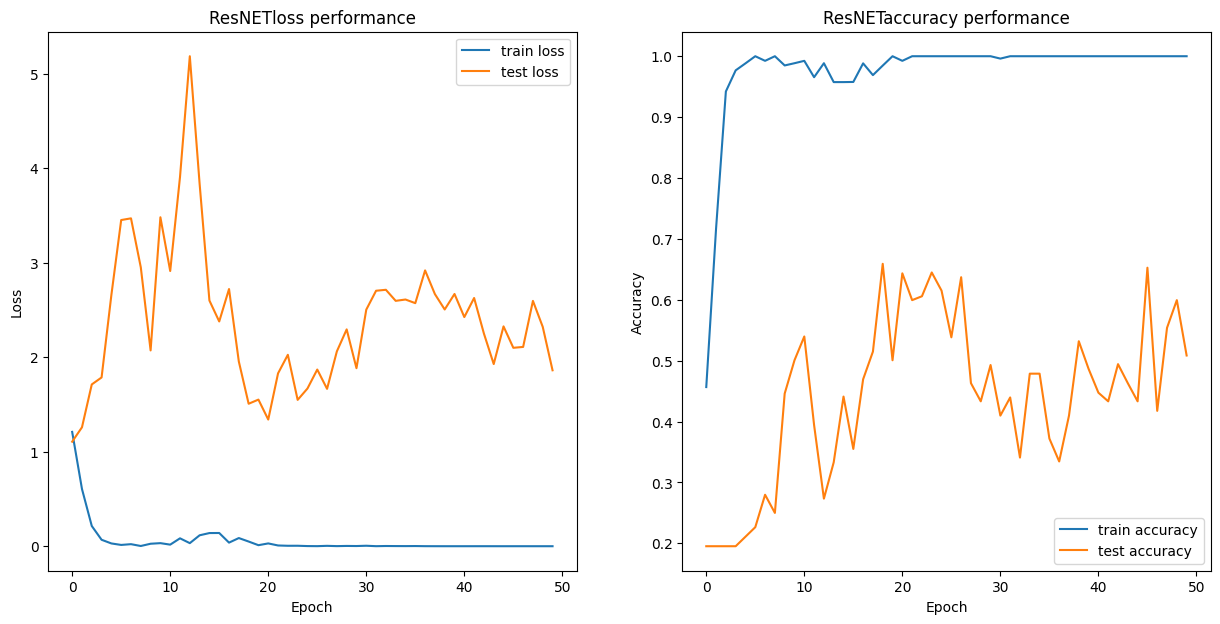

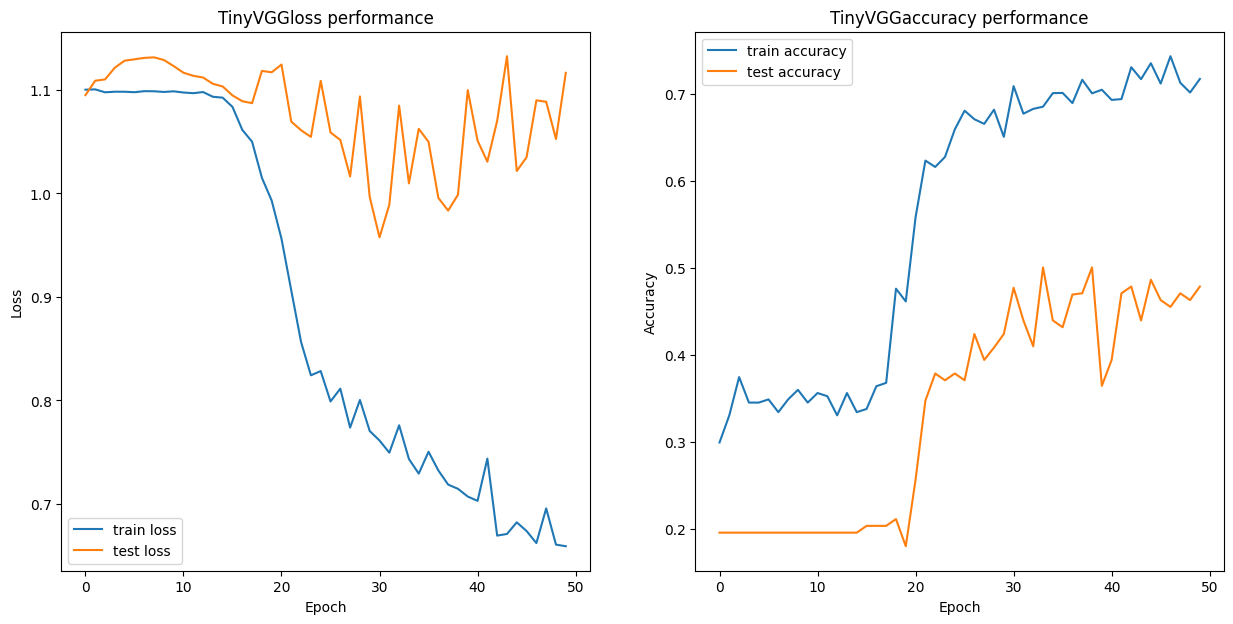

In [81]:
# ------ Complete subplot functions in the following lines -------
# plt.figure(figsize=(15, 10))

# # Get number of epochs
# epochs = range(len(model_0_df))

# # Plot train loss with label, title, legend
# plt.subplot(2, 2, 1)




# plt.legend()

# # Plot test loss
# plt.subplot(2, 2, 2)




# plt.legend()

# # Plot train accuracy
# plt.subplot(2, 2, 3)
 



# plt.legend()

# # Plot test accuracy
# plt.subplot(2, 2, 4)




# plt.legend()
plot_loss_curves(model_resnet_results, model_name = "ResNET")
plot_loss_curves(model_e_50_results, model_name = 'TinyVGG')

# RESULTS

We can see that both models perform poorly due to reasons specified above in Section 5. ResNet model trained for 50 epochs has a slightly better Accuracy than TinyVGG when no special dataset transforms are used

### A3: Git version control (5 points)
Please insert an image in the cell to show your git log

### Git version control advices
1. Create a remote repo, upload this notebote to the repo\
   **Take a screenshot of the inital status**
2. git clone (ssh link of the repo)
3. Make some modifications to the files
4. git add .
5. git commit -m "leave some message here"
6. git push
7. git log
8. check the remote repo, **Take a screenshot after git push operations**

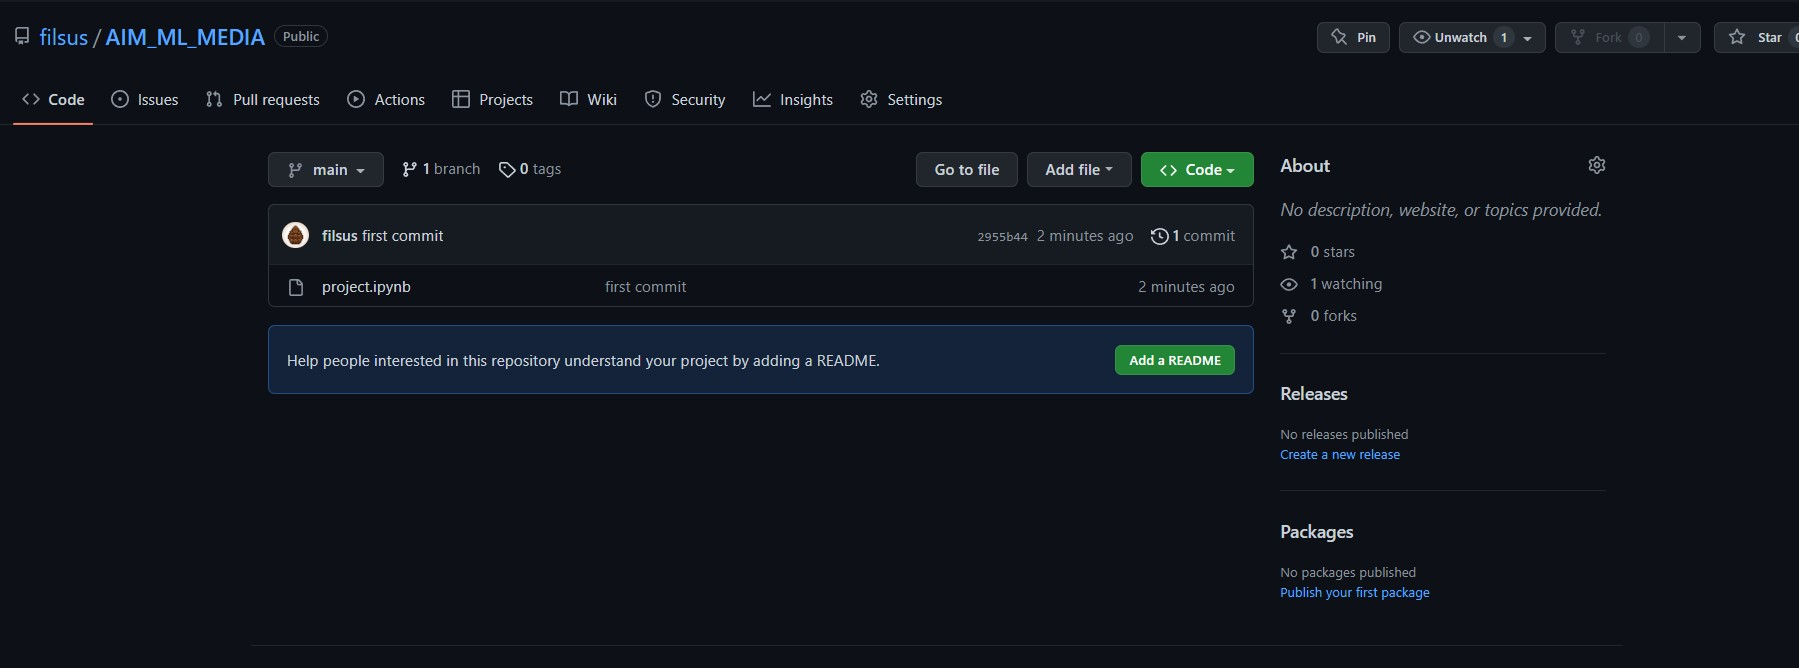

In [ ]:
from IPython.display import Image
Image("./git_workflow/initialcommit.jpg")

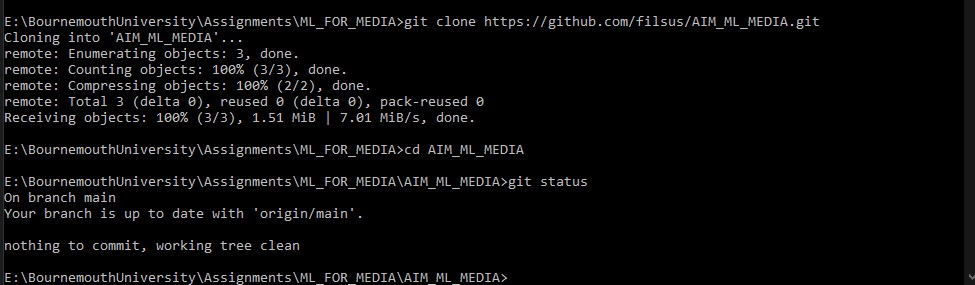

In [ ]:
Image("./git_workflow/gitclone.jpg")

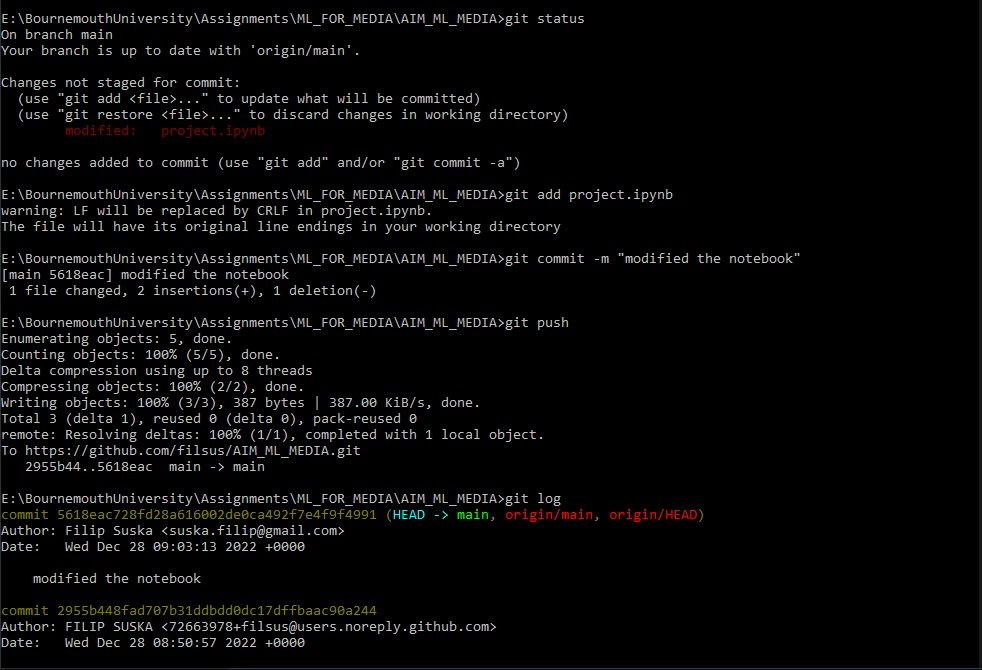

In [ ]:
Image("./git_workflow/git.jpg")

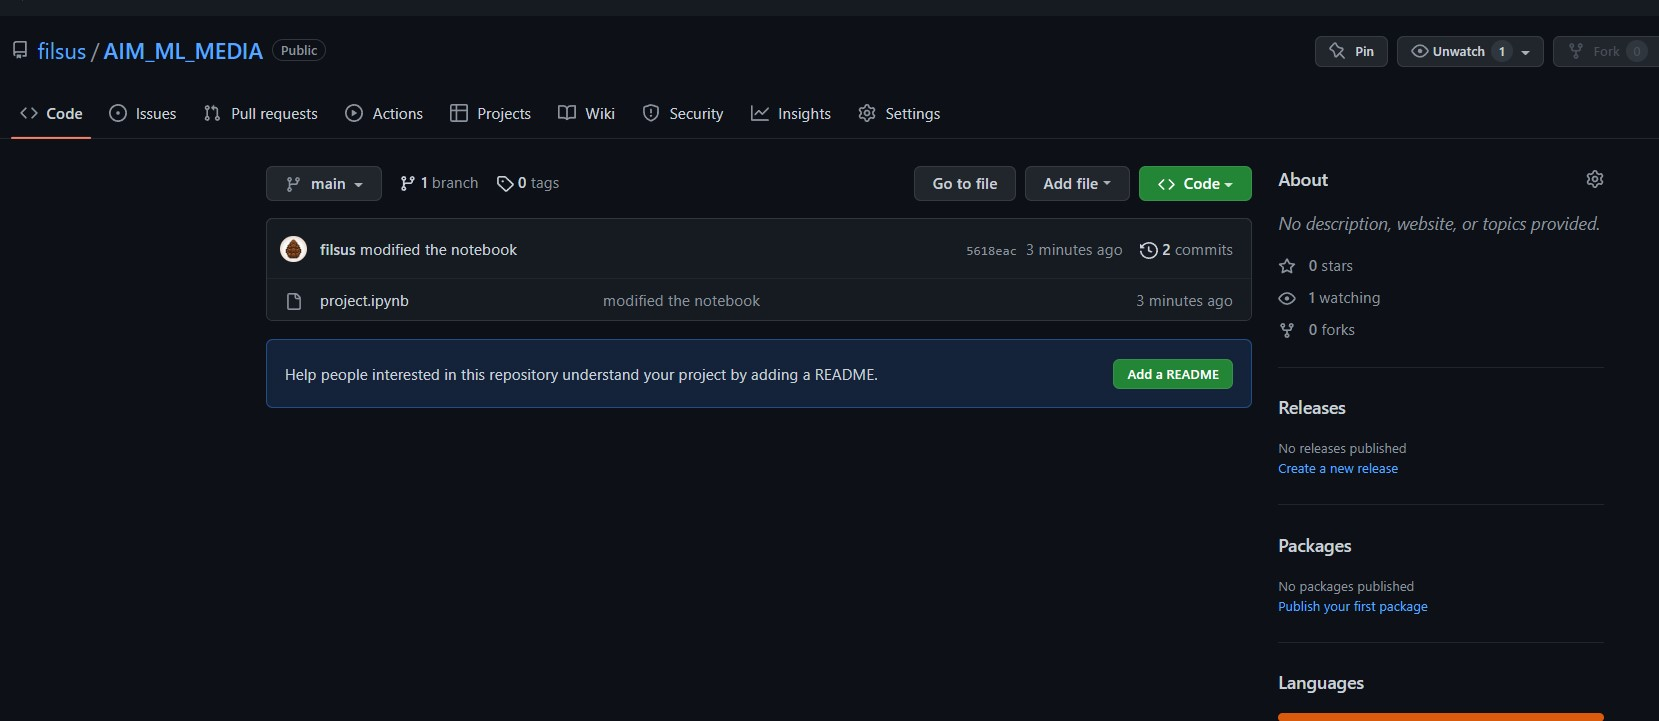

In [ ]:
Image("./git_workflow/furthercommit.jpg")